In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

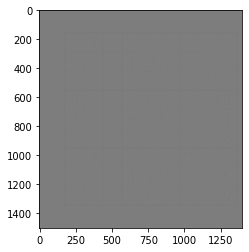

In [73]:
image = cv2.imread('sudoku.tif')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')

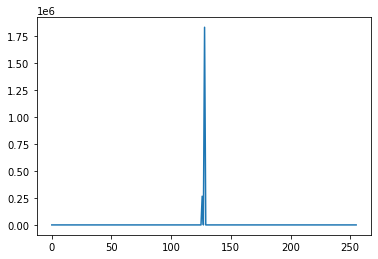

In [74]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(histogram)

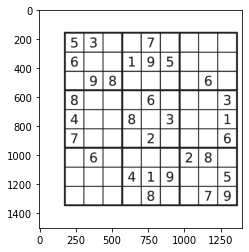

In [75]:
image2 = cv2.equalizeHist(image)
plt.imshow(image2, cmap='gray')

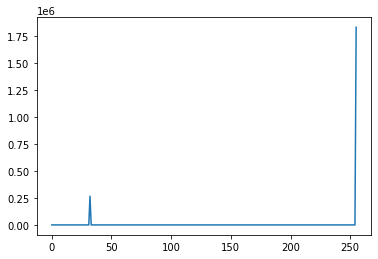

In [76]:
histogram2 = cv2.calcHist([image2], [0], None, [256], [0, 256])
plt.plot(histogram2)

In [77]:
def remove_lines(img, num):
    image3 = img[~np.all(img == num, axis=1)]
    idx = np.argwhere(np.all(image3[..., :] == num, axis=0))
    image_out = np.delete(image3, idx, axis=1)
    return image_out

In [78]:
image_boarder = remove_lines(image2, image2.max())

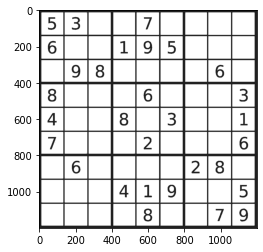

In [79]:
plt.imshow(image_boarder, cmap = 'gray')

In [80]:
splitted = np.array_split(image_boarder, 9)

In [81]:
cells = []
for i in range(9):
    row = np.array_split(splitted[i], 9, axis=1)
    for j in range(9):
        cell = row[j]
        cells.append(cell)

In [82]:
len(cells)

81

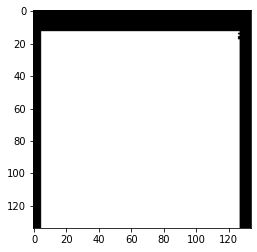

In [83]:
plt.imshow(cells[2], cmap= 'gray')

In [84]:
final_cells = []
for i in range(len(cells)):
    im = remove_lines(cells[i], cells[i].min())
    final_cells.append(im)

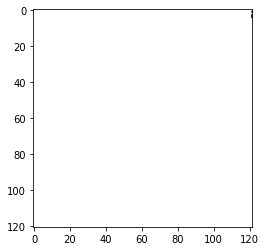

In [85]:
plt.imshow(final_cells[2], cmap='gray')

In [86]:
# print(len(final_cells))
# print(type(final_cells))

selected_num = []

for idx, cell in enumerate(final_cells):
    # print(cell[cell == cell.min()].shape[0])
    if cell[cell == cell.min()].shape[0] > 500 and cell.min() < 100:
        selected_num.append(cell)
        

In [87]:
len(selected_num)

27

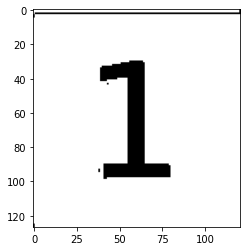

In [90]:
plt.imshow(selected_num[4], cmap= 'gray')

## All detected numbers are in 'selecte_num' list and can be process in later steps

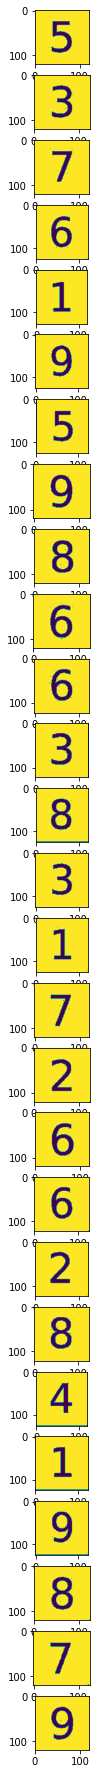

In [89]:
rows= 1 #len(selected_num)
cols = len(selected_num)

plt.figure(figsize=(32, 32))

for idx, pic in enumerate(selected_num):
    plt.subplot(len(selected_num), 1, idx+1)
    plt.imshow(pic)
    
plt.show()